In [2]:
import numpy as np
from numpy import random
a=random.rand(3,6)
print(a)
for i in range(3):
    a[i, :]=a[i, :]+[0, 0, 2, 4, 5, 3]

b=a.reshape(9,2)

c=b.transpose()


[[0.82093308 0.97193815 0.15598244 0.1117305  0.99242159 0.1462957 ]
 [0.83749488 0.30660976 0.07051235 0.70300486 0.70653702 0.69428648]
 [0.626149   0.64535317 0.98423164 0.7428163  0.11863747 0.69697669]]


In [3]:
d=np.mean(c)
for i in range (2):
    for j in range (9):
        if c[i,j]>d:
            print(f"({i},{j})")


(0,2)
(0,5)
(0,7)
(0,8)
(1,1)
(1,2)
(1,4)
(1,5)
(1,7)
(1,8)


# Assignment 2
'''
Create an array of length 20 that models a poisson distribution and center it around the mean and normalise it by dividing it by the standard deviation
(Centering around some value "a" is subtracting "a" from each element and normalising is to divide it by some factor)
'''

In [4]:
k=random.poisson(size=20)

m=np.mean(k)
n=np.std(k)
k=k-m
k=k/n
print(np.mean(k))
print(np.std(k))

5.551115123125783e-18
0.9999999999999999


# Assignment 1
'''
Create a numpy array of length 1000 which resembles a normal distribution with mean 0 and standard deviation 1.
Create 2 subplots both histograms with 20 bins side by side, one which has a beta (a=2, b=5) distribution, the other which has the normal distribution.
'''
'\nCreate a numpy array of length 1000 which resembles a normal distribution with mean 0 and standard deviation 1.\nCreate 2 subplots both histograms with 20 bins side by side, one which has a beta (a=2, b=5) distribution, the other which has the normal distribution.\n'
# TODO
# Assignment 2
'''
Generate a NumPy array of 1000 random values drawn from a normal distribution with mean 0 and std. dev 1
Plot a histogram of the data with 20 bins.
Add vertical lines to indicate the mean of the data, the 25th percentile and the 75th percentile.
Annotate the plot with labels for the mean, 25th percentile, and 75th percentile.
Customize the visualization (light pink colour scheme, titles, labels, legend)

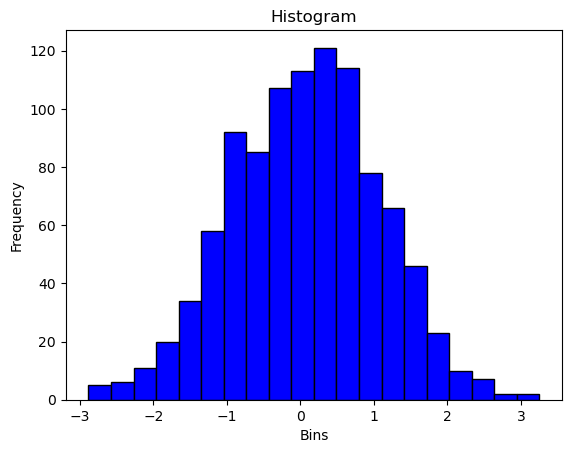

In [5]:
import matplotlib.pyplot as plt
nd=random.normal(loc=0,scale=1,size=1000)
# Data


# Create histogram
plt.hist(nd, bins=20, color="blue", edgecolor="black")

# Add labels and title
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Histogram")

# Show the plot
plt.show()


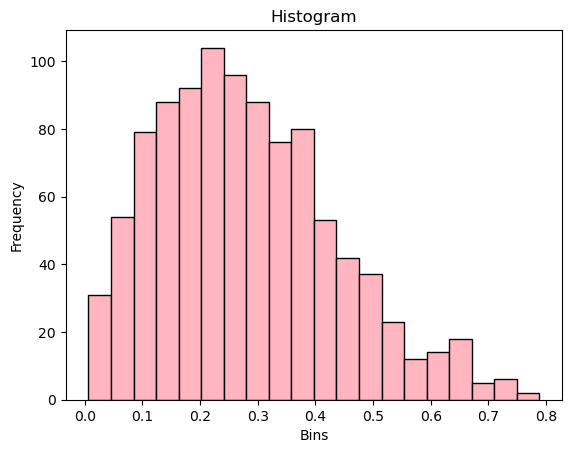

In [6]:
bg=random.beta(a=2,b=5,size= 1000)
plt.hist(bg, bins=20, color="lightpink", edgecolor="black")

# Add labels and title
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Histogram")

# Show the plot
plt.show()

Mean is -0.0312709444207697
25th percentile is -0.6260872231761128
75th percentile is 0.6190143175673174


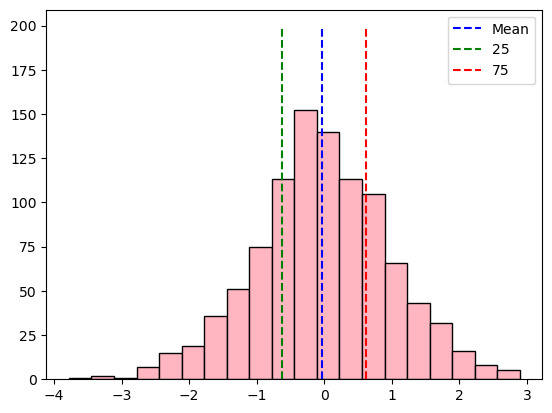

In [7]:
import matplotlib.pyplot as plt
nd=random.normal(loc=0,scale=1,size=1000)
sz=np.arange(200)
m=np.mean(nd)
ma=np.ones(200)
me=ma*m
q1=np.percentile(nd,25)
qa=q1*ma
q2=np.percentile(nd,75)
qb=q2*ma
print(f"Mean is {m}")
print(f"25th percentile is {q1}")
print(f"75th percentile is {q2}")
plt.plot(me,sz,label="Mean",color="blue", linestyle="--")
plt.plot(qa,sz,label="25",color="green", linestyle="--")
plt.plot(qb,sz,label="75",color="red", linestyle="--")
plt.hist(nd, bins=20, color="lightpink", edgecolor="black")
plt.legend()
plt.show()

Import videogamesales.csv and perform the following actions on it
Add a column of 'global_sales' showing the total sales of all the different regions to the data frame and sort (highest first) and print the DataFrame according to it.
Display a plot of the total number of copies sold of each genre globally.
Filter out only the games containing 'Grand Theft Auto' in their name and display the following as a DataFrame:
a. their name
b. the platform they were released on
c. the year they were released in
d. the sum of sales in only Europe and Japan
Display a pie chart of the total sales of all Grand Theft Auto games combined in North America, Europe, Japan, and other sales.
'''

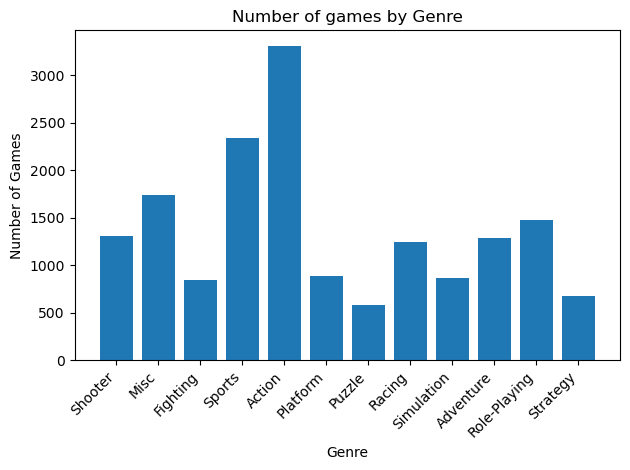

/tmp/ipykernel_4843/1480556395.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Net_sum"]=new_df["EU_Sales"]+new_df["JP_Sales"]


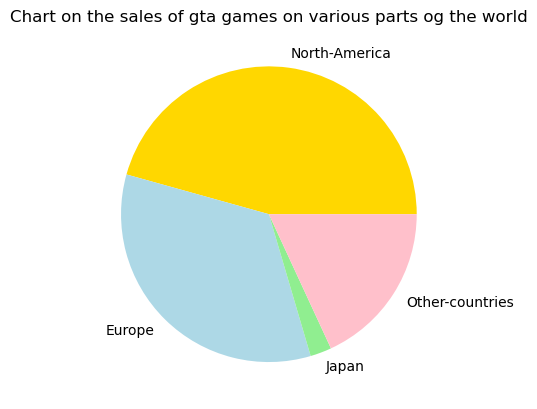

In [8]:
import pandas as pd
df=pd.read_csv("videogamesales.csv")
df["global_sale"]=df["EU_Sales"]+df["JP_Sales"]+df["NA_Sales"]+df["Other_Sales"]
df_sorted = df.sort_values(by="global_sale", ascending=False)

counts={}
for item in df["Genre"]:
    if item in counts:
        counts[item] += 1
    else:
        counts[item] = 1
games=list(counts.keys())
number=list(counts.values())
plt.bar(games, number)
plt.xticks(rotation=45, ha='right')
plt.title('Number of games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')

plt.tight_layout()
plt.savefig('genres.png')  
plt.show() 
new_df = df[df["Name"].str.contains("Grand Theft Auto", na=False)]
n_df = df[df["Name"].str.contains("Grand Theft Auto", na=False)]
new_df["Net_sum"]=new_df["EU_Sales"]+new_df["JP_Sales"]
new_df = new_df.drop(columns=["EU_Sales","JP_Sales","Genre","Publisher","NA_Sales","Other_Sales"])
na = n_df["NA_Sales"].sum()
eu = n_df["EU_Sales"].sum()
jp = n_df["JP_Sales"].sum()
os=n_df["Other_Sales"].sum()
# Data
sizes = [na, eu, jp, os]
labels = ["North-America","Europe","Japan","Other-countries"]
colors = ["gold", "lightblue", "lightgreen", "pink"]
# explode = (0.1, 0, 0, 0)  # Highlight the first slice

# Create pie chart
plt.pie(sizes, labels=labels, colors=colors)#, explode=explode, autopct="%1.1f%%", shadow=True)

# Add title
plt.title("Chart on the sales of gta games on various parts og the world")

# Show the plot
plt.show()